<a href="https://colab.research.google.com/github/yesmubin/LinearRegression/blob/main/outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic import**




In [12]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
iris= datasets.load_iris()
X=iris.data
Y=iris.target
print(X.shape)

(150, 4)


In [19]:
#create dataframe for X
df =  pd.DataFrame(X,columns=["sepal_length","sepal_width","petal_length","petal_width"])
#print (df.to_string())
df["class"]=list(Y)
print(df.shape)
#print (df.to_string())

(150, 5)


In [20]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [21]:
#Boxplot
def plot_boxplot(df,ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show



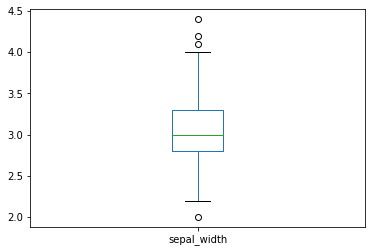

In [25]:
plot_boxplot(df,"sepal_width")

In [38]:
#define function called outliers which returns  a list of index of outliers
#IQR = Q3-Q2
#+/- 1.5*IQR
def outliers(df,ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5*IQR
  ls = df.index[(df[ft]<lower_bound) | (df[ft]> upper_bound)]
  print(ls)
  return ls


In [39]:
index_list = []
for feature in ['sepal_width','petal_width']:
  index_list.extend(outliers(df,feature))
print(index_list)

Int64Index([15, 32, 33, 60], dtype='int64')
Int64Index([], dtype='int64')
[15, 32, 33, 60]


In [45]:
#remove outliers
def remove_outliers(df,lst):
  lst =sorted(set(lst))
  print(type(lst))
  df = df.drop(lst)
  return df

In [47]:
df_cleaned = remove_outliers(df,index_list)
df_cleaned.shape

<class 'list'>


(146, 5)

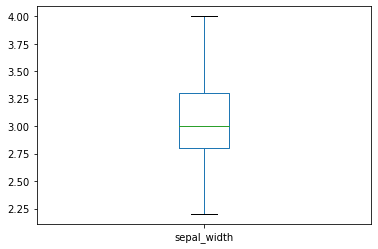

In [48]:
plot_boxplot(df_cleaned,"sepal_width")